# Interstellar radiation field

* See Ch 12.5 in Draine (2011) for brief introduction

## ISRF by Mathis+83

Text(0, 0.5, '$\\nu J_{\\nu}\\,[{\\rm erg}\\,{\\rm cm}^{-2}\\,{\\rm s}^{-1}\\,{\\rm sr}^{-1}]$')

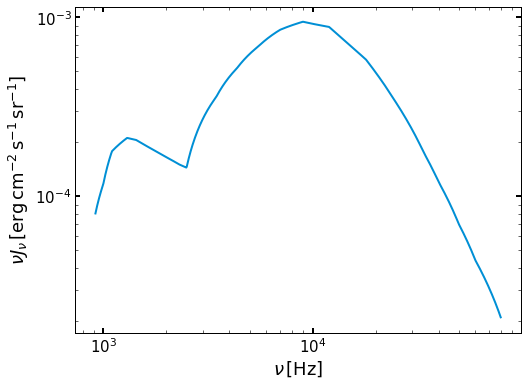

In [8]:
from pyathena.util import rad_isrf

wav = np.logspace(np.log10(500), 5, 1000)*au.angstrom
nu = (ac.c/wav).to('Hz')
plt.loglog(wav, nu*rad_isrf.Jnu_MMP83(wav))
plt.xlabel(r'$\nu\,[{\rm Hz}]$')
plt.ylabel(r'$\nu J_{\nu}\,[{\rm erg}\,{\rm cm}^{-2}\,{\rm s}^{-1}\,{\rm sr}^{-1}]$')

### ISRF by Draine (1978)

In [9]:
E = np.linspace(6,13.6, 1000)*au.eV
#nuJnu = (E**2*F_E_Dr78(E)).to('erg s-1 cm-2 sr-1')
nuJnu_Dr78 = rad_isrf.nuJnu_Dr78(E)
wav = (ac.h*ac.c/E).to('angstrom')
nu = (ac.c/wav).to('Hz')
log_nu = np.log(nu.value)
J_Dr78 = integrate.trapz(nuJnu_Dr78, x=log_nu)
idx = np.logical_and(r['wav'].value < 2068.0, r['wav'].value > 912.0)
J_FG20 = - integrate.trapz(r['nu'][idx]*Jnu_z0[idx], x=np.log(r['nu'][idx]))

print('J_FUV,Dr78', J_Dr78.value)
print('J_FUV,FG20', J_FG20)
print('J_FUV,FG20 / J_FUV,Dr78:', J_FG20/J_Dr78.value)

J_FUV,Dr78 0.00021327086542698685
J_FUV,FG20 1.2766919166313456e-06
J_FUV,FG20 / J_FUV,Dr78: 0.005986246241723159


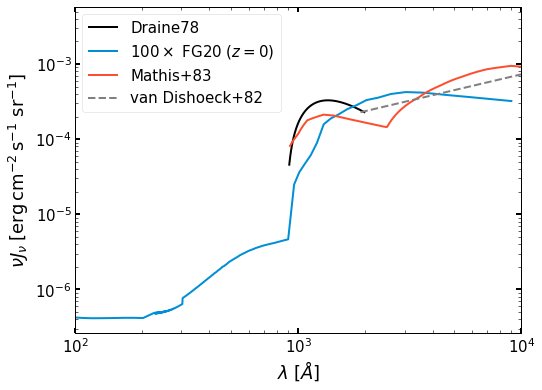

In [10]:
pa.set_plt_fancy()
fig,ax = plt.subplots(1,1,figsize=(8,6))

idx = wav.value < 2000.0
plt.loglog(wav[idx], nuJnu_Dr78[idx], label='Draine78', c='k', ls='-', lw=2)
plt.loglog(r['wav'], r['nu']*100.0*Jnu_z0, label=r'$100 \times $ FG20 ($z=0$)', c='C0', ls='-', lw=2)

wav2 = np.logspace(np.log10(500), 5, 1000)*au.angstrom
nu2 = (ac.c/wav2).to('Hz')
plt.plot(wav2, nu2*rad_isrf.Jnu_MMP83(wav2), c='C1', label='Mathis+83')

idx = wav2.value > 1900.0
plt.plot(wav2[idx], nu2[idx]*(rad_isrf.Jnu_vD82(wav2)*(ac.h*ac.c/wav2).to('erg')/(4.0*np.pi*au.sr))[idx],
         label='van Dishoeck+82', c='grey', ls='--', lw=2)

x_linear = False

if x_linear:
    plt.xscale('linear')
    plt.xlim(0,1e4)
else:
    plt.xscale('log')
    plt.xlim(1e2,1e4)
    
#plt.ylim(1e-23,1e-17)
plt.xlabel(r'$\lambda\;[\AA]$')
plt.ylabel(r'$\nu J_{\nu}\;[{\rm erg\,{\rm cm}^{-2}\,{\rm s}^{-1}\,{\rm }\,{\rm sr}^{-1}}]$')
plt.legend(loc=2)
plt.savefig('/tigress/jk11/figures/NEWCOOL/fig-ISRF-UVB.png', dpi=200, bbox_inches='tight')

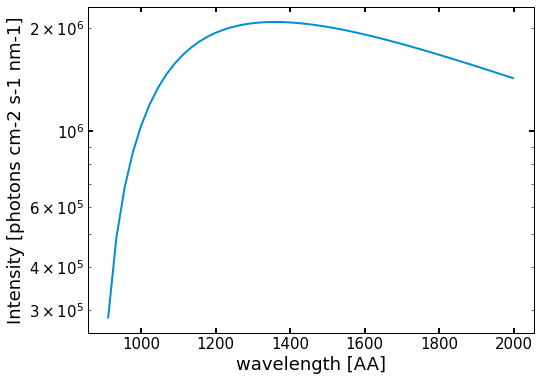

In [11]:
def ISRF_Draine(l):
    """wavelength in nm
    
    See Eq.(2) in Heays+17
    """
    A = 3.2028e13
    B = -5.1542e15
    C = 2.0546e17
    
    return (A/l**3 + B/l**4 + C/l**5)/au.cm**2/au.s/au.nm

l = np.linspace(91.2,200.0)
plt.plot(l*10, ISRF_Draine(l))
plt.xlabel('wavelength [AA]')
plt.ylabel('Intensity [photons cm-2 s-1 nm-1]')
plt.yscale('log')

In [13]:
def get_Dr78_mean_intensity(l0,l1):
    """
    Integrate Eq. 4 in Heays+17 for Draine radiation field (eq 2)
    
    l in nm
    returns mean intensity in units of erg/s/cm^2/sr
    """
    A = 3.2028e13
    B = -5.1542e15
    C = 2.0546e17
    
    return ac.h.value*ac.c.value*(A/3.0*(l0**(-3) - l1**(-3)) + \
                                  B/4.0*(l0**(-4) - l1**(-4)) + \
                                  C/5.0*(l0**(-5) - l1**(-5))) * 1e16 / (4.0*np.pi)

lwav1 = (ac.h*ac.c/(6.0*au.eV)).to('nm').value
print('wav1',lwav1)
J_FUV_ISRF = get_Dr78_mean_intensity(91.2, lwav1)
J_LW_ISRF = get_Dr78_mean_intensity(91.2, 110.8)
J_PE_ISRF = get_Dr78_mean_intensity(110.8, lwav1)

print('Draine ISFR FUV energy density (91.2nm-{:.1f}nm):'.format(lwav1),
      J_FUV_ISRF/ac.c.cgs.value*(4.0*np.pi))
print('Draine ISFR FUV mean intensity (91.2nm-200nm):',J_FUV_ISRF)
print('Draine ISRF LW energy density (91.2nm-110.8nm):',J_LW_ISRF/ac.c.cgs.value*(4.0*np.pi))
print('Draine ISRF PE energy density (110.8nm-200.0nm):',J_PE_ISRF/ac.c.cgs.value*(4.0*np.pi))
print('Draine ISRF LW mean intensity (91.2nm-110.8nm):',J_LW_ISRF)
print('Draine ISRF PE mean intensity (110.8nm-200.0nm):',J_PE_ISRF/ac.c.cgs.value*(4.0*np.pi))

wav1 206.64033072200044
Draine ISFR FUV energy density (91.2nm-206.6nm): 8.937562277848957e-14
Draine ISFR FUV mean intensity (91.2nm-200nm): 0.0002132209725489666
Draine ISRF LW energy density (91.2nm-110.8nm): 1.334655047031923e-14
Draine ISRF PE energy density (110.8nm-200.0nm): 7.602907230817035e-14
Draine ISRF LW mean intensity (91.2nm-110.8nm): 3.18404994895346e-05
Draine ISRF PE mean intensity (110.8nm-200.0nm): 7.602907230817035e-14


## Starburst99

https://www.stsci.edu/science/starburst99/docs/default.htm

In [19]:
from pyathena.util import sb99

#sb = sb99.SB99()
sb = sb99.SB99('/tigress/jk11/code/starburst99/output2/', prefix='aa')
rw = sb.read_wind()
rs = sb.read_sn()
rr = sb.read_rad()

In [21]:
rr.keys()

dict_keys(['df', 'df_dust', 'time_yr', 'time_Myr', 'wav', 'logf', 'logM', 'L', 'pdot', 'tdecay_lum', 'wav0', 'wav1', 'wav2', 'wav3', 'Cabs', 'Cext', 'hnu', 'Cabs_mean', 'Cext_mean', 'hnu_mean'])

In [18]:
#pa.set_plt_fancy()
#plt_isrf = True
#fig = sb.plt_spec_sigmad(rr=rr, tmax=50.0, nstride=10, plt_isrf=plt_isrf)
# if plt_isrf:
#     fname = '/tigress/jk11/figures/NEWCOOL/fig-sb99-spec-isrf-wd01-dust.png'
# else:
#     fname = '/tigress/jk11/figures/NEWCOOL/fig-sb99-spec-wd01-dust.png'
# plt.savefig(fname, dpi=200, bbox_inches='tight')

## UV background by Faucher-Giguère (2020)

https://ui.adsabs.harvard.edu/abs/2020MNRAS.493.1614F/abstract

https://galaxies.northwestern.edu/uvb-fg20/

dict_keys(['nwav', 'wav', 'nz', 'z', 'Jnu', 'nu', 'ds'])


Text(0, 0.5, '$\\nu J_{\\nu}$')

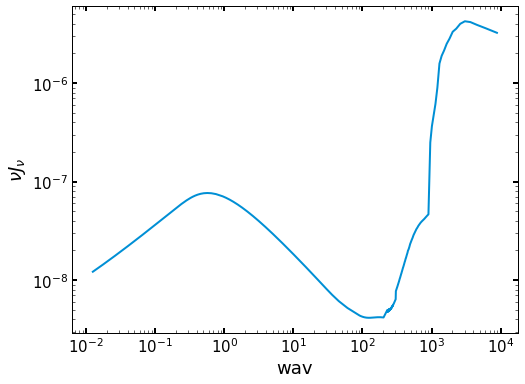

In [6]:
from pyathena.util import rad_uvb

r = rad_uvb.read_FG20()
print(r.keys())

Jnu_z0 = r['ds']['Jnu'].sel(z=0)
Jlambda_z0 = (Jnu_z0.data*au.erg/au.s/au.cm**2/au.Hz/au.sr*(ac.c/r['wav']**2)).to('erg s-1 cm-2 sr-1 angstrom-1')
# Jlambda_z0
plt.loglog(r['wav'], r['nu']*Jnu_z0)
plt.xlabel('wav')
plt.ylabel(r'$\nu J_{\nu}$')

In [7]:
# Calculate Frequency integrated mean intensity in the FUV wavelength range
from scipy import integrate
idx = np.logical_and(r['wav'].value < 2000.0, r['wav'].value > 912.0)
J_FG20 = - integrate.trapz(r['nu'][idx]*Jnu_z0[idx], x=np.log(r['nu'][idx]))
print(J_FG20)

9.530878632899835e-07
